In [0]:
!pip install rasterio

     |████████████████████████████████| 15.1MB 149kB/s 


In [0]:
"""
Tests a model, given a satellite image.
Inputs:
    * Model to use (.h5 file)
    * Input satellite image
"""
# example of loading a pix2pix model and using it for image to image translation
from tensorflow.keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from matplotlib.colors import NoNorm
import sys, os
import rasterio

from google.colab import drive
from google.colab import files
import sys


In [0]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# plot source, generated and target images
def plot_images(src_img, gen_img):
    # scale from [-1,1] to [0,1]
    src_img = (src_img + 1) / 2.0
    gen_img = (gen_img + 1) / 2.0
    titles = ['Source', 'Generated']

    pyplot.subplot(1, 2, 1)
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(src_img)
    # show title
    pyplot.title(titles[0])

    pyplot.subplot(1, 2, 2)
    pyplot.axis('off')
    # we need to get rid of the last dimension:
    im = gen_img[:,:,0]
    pyplot.imshow(im, cmap='gray', norm=NoNorm())
    # show title
    pyplot.title(titles[1])
    pyplot.draw()

def denormalize(arr, oldMin, oldMax, newMin, newMax):
	minn = oldMin
	maxx = oldMax
	arr = (newMax - newMin) * (arr - minn)/(maxx - minn) + newMin
	return arr.astype('int16', copy=False)

def saveDEM(temp, arr, name):
    outname = name[:-4] + ".tif"
    os.system("cp " + temp + " " + outname)
    with rasterio.open(outname, 'r+') as ds:
    	ds.write(arr.reshape((1,SIZE,SIZE)))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


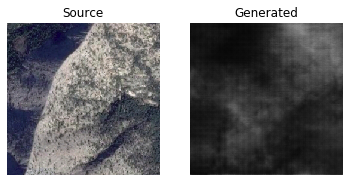

In [8]:
drive.mount('/content/drive')
path = '/content/drive/My Drive/ImageToDEM/'
sys.path.append(path)
inmodel = 'model_050058.h5'
inimage = 'test2.jpg'
SIZE = 256
size = (SIZE, SIZE)
model = load_model(path + inmodel)
# load and resize the image
pixels = load_img(path + inimage, target_size=size)
# convert to numpy array
pixels = img_to_array(pixels)

src_image = (pixels - 127.5) / 127.5
src_image = src_image.reshape((-1, SIZE, SIZE, 3))
# generate image from source
gen_image = model.predict(src_image)

gen_image = gen_image.reshape((SIZE, SIZE, 1))
src_image = src_image.reshape((SIZE, SIZE, 3))
# plot images
plot_images(src_image, gen_image)

In [0]:
! pip3 list | grep Keras
! pip3 list | grep tensorflow

Keras                    2.2.5      
Keras-Applications       1.0.8      
Keras-Preprocessing      1.1.0      
mesh-tensorflow          0.1.4      
tensorflow               1.15.0     
tensorflow-datasets      1.3.0      
tensorflow-estimator     1.15.1     
tensorflow-gan           2.0.0      
tensorflow-hub           0.6.0      
tensorflow-metadata      0.15.0     
tensorflow-privacy       0.2.1      
tensorflow-probability   0.7.0      
